Nabila Salsabila

Python for Data Science - Course - Delta Indie

Latar Belakang

Kesehatan mental merupakan aspek penting dalam kesejahteraan individu dan masyarakat. Dalam beberapa tahun terakhir, kesadaran akan pentingnya kesehatan mental semakin meningkat, seiring dengan bertambahnya jumlah individu yang mencari diagnosis dan perawatan untuk berbagai gangguan mental, seperti depresi, kecemasan, dan gangguan stres pascatrauma. Dalam buku Diagnostic and stastistical manual of mental disorder – 5th (DSM-V) gangguan mental merupakan sindrom yang ditandai oleh regulasi emosi dan perilaku yang mencerminkan ketidakfungsian dalam proses psikologis, biologis, atau perkembangan yang mendasari fungsi mental. misalnya gangguan kecemasan, depresi dan perasaan/afektif atau dapat disebut dengan psychological distress

Faktor yang menjadi pemicu timbulnya psychological distress bagi setiap individu berbeda-beda seperti prestasi akademik, hubungan dengan teman, jenis kelamin, kualitas tidur, masalah keuangan, ekonomi dan budaya. Dalam penelitian ini, kita akan menganalisis hubungan antara kualitas tidur dengan faktor-faktor lain seperti tingkat keparahan gejala, skor suasana hati, tingkat stres, dan progres perawatan. Dengan memahami pola ini, kita dapat mengembangkan model prediktif untuk membantu tenaga medis dalam menganalisis kondisi pasien dan menentukan strategi perawatan yang lebih efektif.

Dataset yang digunakan mencakup berbagai variabel penting, seperti usia, tingkat keparahan gejala, aktivitas fisik, durasi perawatan, serta kepatuhan pasien terhadap terapi yang diberikan. Dengan menggunakan teknik pemodelan regresi seperti Gradient Boosting Regressor, Random Forest Regressor, dan XGBoost, penelitian ini bertujuan untuk memprediksi hasil perawatan berdasarkan faktor-faktor tersebut.



Penjelasan Per Kolom 

1. Patient ID = Identifikasi unik untuk setiap pasien.
2. Age = Usia pasien dalam tahun.
3. Gender = Jenis kelamin pasien (Male/Female).
4. Diagnosis = Kondisi kesehatan mental yang dialami pasien (misalnya, Anxiety, Depression).
5. Symptom Severity (1-10) = Tingkat keparahan gejala yang dialami pasien, dalam skala 1-10.
6. Mood Score (1-10) = Skor suasana hati pasien selama perawatan, dalam skala 1-10.
7. Sleep Quality (1-10) = Kualitas tidur pasien yang dilaporkan sendiri, dalam skala 1-10.
8. Physical Activity = Jumlah jam aktivitas fisik pasien per minggu.
9. Medication = Jenis obat yang diresepkan untuk pasien (misalnya, SSRIs, Antidepressants).
10. Therapy Type = Jenis terapi yang diterima pasien (misalnya, CBT, DBT).
11. Treatment Start Date = Tanggal dimulainya perawatan pasien.
12. Treatment Duration = Lama perawatan dalam minggu.
13. Stress Level (1-10) = Tingkat stres pasien yang dilaporkan sendiri, dalam skala 1-10.
14. Outcome = Hasil dari perawatan yang dijalani pasien (misalnya, Improved, Deteriorated).
15. Treatment Progress (1-10) = Kemajuan yang dibuat pasien selama perawatan, dalam skala 1-10.
16. AI-Detected Emotional State = Kondisi emosional pasien yang terdeteksi oleh AI (misalnya, Happy, Anxious).
17. Adherence to Treatment (%) = Persentase kepatuhan pasien terhadap rencana perawatan yang diberikan.

Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("mental_health_diagnosis_treatment_.csv")
df

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43,Female,Major Depressive Disorder,10,5,8,5,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,9,Deteriorated,7,Anxious,66
1,2,40,Female,Major Depressive Disorder,9,5,4,7,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7,No Change,7,Neutral,78
2,3,55,Female,Major Depressive Disorder,6,3,4,3,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,7,Deteriorated,5,Happy,62
3,4,34,Female,Major Depressive Disorder,6,3,6,5,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8,Deteriorated,10,Excited,72
4,5,52,Male,Panic Disorder,7,6,6,8,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5,Deteriorated,6,Excited,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,Male,Generalized Anxiety,10,4,8,6,Mood Stabilizers,Dialectical Behavioral Therapy,2024-04-09,8,9,Improved,10,Depressed,73
496,497,22,Male,Panic Disorder,5,6,6,7,Benzodiazepines,Mindfulness-Based Therapy,2024-02-05,13,6,Deteriorated,8,Happy,86
497,498,23,Male,Major Depressive Disorder,7,3,4,2,Antidepressants,Cognitive Behavioral Therapy,2024-03-24,10,5,Deteriorated,5,Neutral,87
498,499,48,Male,Bipolar Disorder,9,4,6,9,Antidepressants,Mindfulness-Based Therapy,2024-03-22,10,6,Improved,7,Anxious,73


In [3]:
selected_features = [
    "Age", "Gender", "Symptom Severity (1-10)", "Mood Score (1-10)", 
    "Sleep Quality (1-10)", "Physical Activity (hrs/week)", "Treatment Duration (weeks)", 
    "Stress Level (1-10)", "Treatment Progress (1-10)", "Adherence to Treatment (%)"
]
df = df[selected_features]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           500 non-null    int64 
 1   Gender                        500 non-null    object
 2   Symptom Severity (1-10)       500 non-null    int64 
 3   Mood Score (1-10)             500 non-null    int64 
 4   Sleep Quality (1-10)          500 non-null    int64 
 5   Physical Activity (hrs/week)  500 non-null    int64 
 6   Treatment Duration (weeks)    500 non-null    int64 
 7   Stress Level (1-10)           500 non-null    int64 
 8   Treatment Progress (1-10)     500 non-null    int64 
 9   Adherence to Treatment (%)    500 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 39.2+ KB


Data Cleansing

In [5]:
df.isnull().sum()

Age                             0
Gender                          0
Symptom Severity (1-10)         0
Mood Score (1-10)               0
Sleep Quality (1-10)            0
Physical Activity (hrs/week)    0
Treatment Duration (weeks)      0
Stress Level (1-10)             0
Treatment Progress (1-10)       0
Adherence to Treatment (%)      0
dtype: int64

In [6]:
df.duplicated().sum()

0

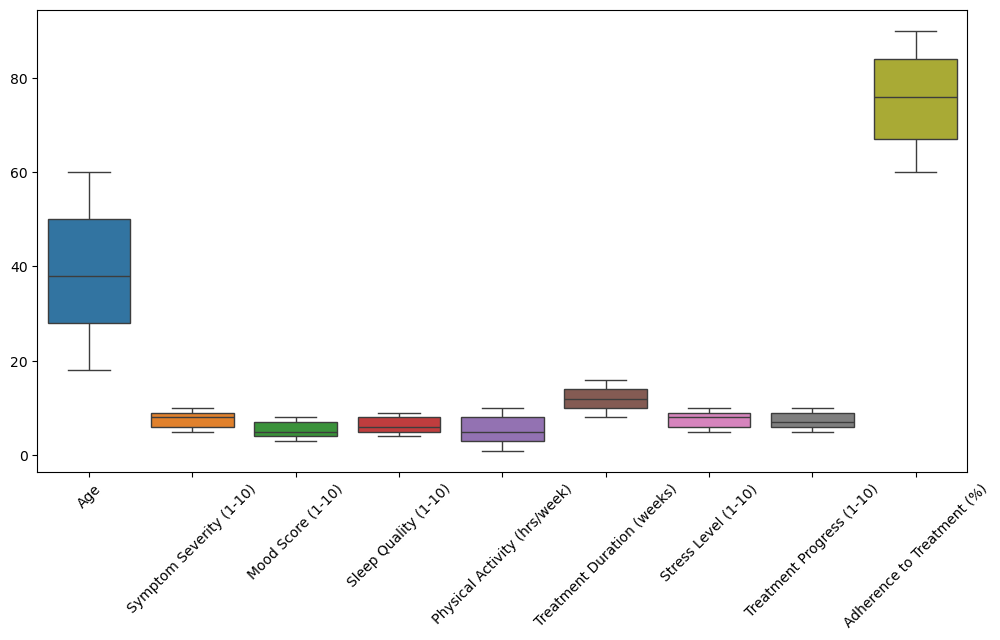

In [7]:
numerical_features = ["Age", "Symptom Severity (1-10)", "Mood Score (1-10)", 
                      "Sleep Quality (1-10)", "Physical Activity (hrs/week)", 
                      "Treatment Duration (weeks)", "Stress Level (1-10)", 
                      "Treatment Progress (1-10)", "Adherence to Treatment (%)"]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_features])
plt.xticks(rotation=45)
plt.show()

Pre-Procesing Data

In [8]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

categorical_cols = ['Gender']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [9]:
df.head()

,Age,Gender,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Treatment Duration (weeks),Stress Level (1-10),Treatment Progress (1-10),Adherence to Treatment (%)
0,43,0,10,5,8,5,11,9,7,66
1,40,0,9,5,4,7,11,7,7,78
2,55,0,6,3,4,3,14,7,5,62
3,34,0,6,3,6,5,8,8,10,72
4,52,1,7,6,6,8,12,5,6,63


In [10]:
print(df.dtypes)

Age                             int64
Gender                          int32
Symptom Severity (1-10)         int64
Mood Score (1-10)               int64
Sleep Quality (1-10)            int64
Physical Activity (hrs/week)    int64
Treatment Duration (weeks)      int64
Stress Level (1-10)             int64
Treatment Progress (1-10)       int64
Adherence to Treatment (%)      int64
dtype: object


Eksplorasi Data Analist

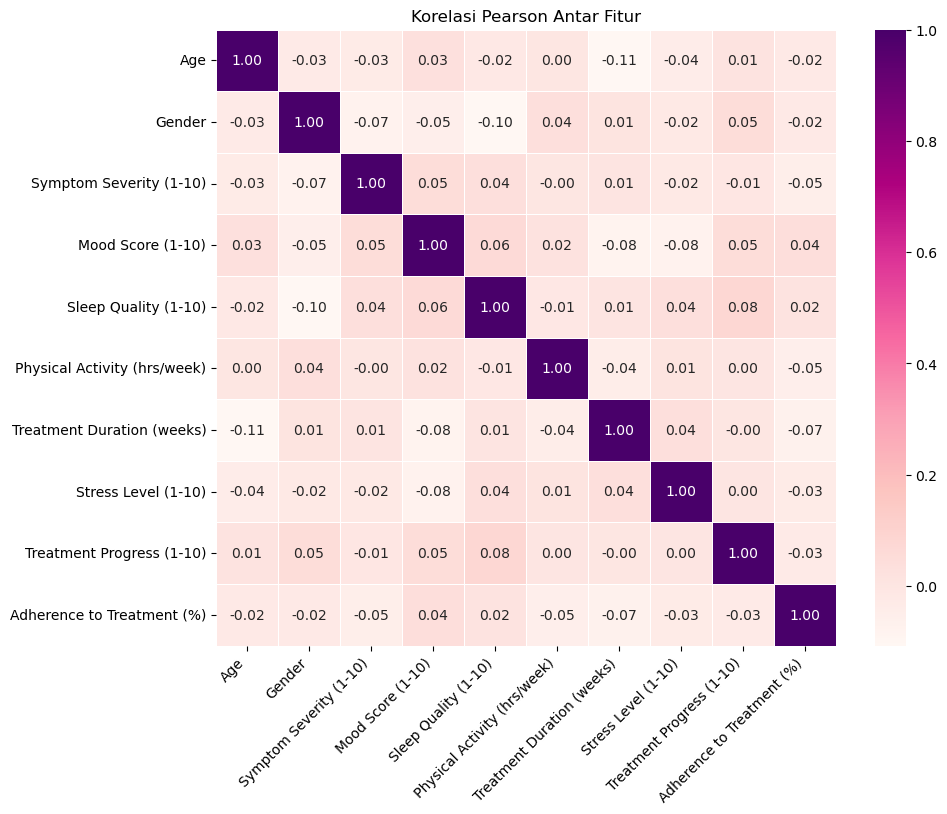

In [11]:
numerical_features = ["Age", "Gender", "Symptom Severity (1-10)", "Mood Score (1-10)", 
                      "Sleep Quality (1-10)", "Physical Activity (hrs/week)", 
                      "Treatment Duration (weeks)", "Stress Level (1-10)", 
                      "Treatment Progress (1-10)", "Adherence to Treatment (%)"]

korelasi_fitur = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(korelasi_fitur, annot=True, cmap="RdPu", fmt=".2f", linewidths=0.5)
plt.title("Korelasi Pearson Antar Fitur")
plt.xticks(rotation=45, ha="right")
plt.show()

Berdasarkan heatmap korelasi Pearson yang ditampilkan, terdapat beberapa fitur yang memiliki hubungan dengan Adherence to Treatment (%), yaitu:

1. Sleep Quality (1-10) dengan nilai korelasi 0.02
   
    Korelasi positif meskipun kecil menunjukkan bahwa semakin baik kualitas tidur seseorang, maka kepatuhan terhadap perawatan cenderung sedikit meningkat.

2. Treatment Duration (weeks) dengan nilai korelasi -0.07

    Korelasi negatif menunjukkan bahwa semakin lama seseorang menjalani perawatan, kemungkinan kepatuhan terhadap perawatan sedikit menurun.

3. Symptom Severity (1-10) dengan nilai korelasi -0.05

    Korelasi negatif ini menunjukkan bahwa semakin parah gejala yang dialami, semakin sedikit tingkat kepatuhan terhadap perawatan.

Meskipun nilai korelasi ini tergolong lemah, mereka tetap memberikan wawasan tentang faktor-faktor yang mungkin berhubungan dengan kepatuhan terhadap perawatan dalam analisis kesehatan mental.

Melatih Model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model_gbr = GradientBoostingRegressor(random_state=42)

In [31]:
model_rfr = RandomForestRegressor(n_estimators=100, random_state=42)

In [32]:
model_xgb = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)

In [33]:
X = df[["Age", "Gender", "Symptom Severity (1-10)", "Mood Score (1-10)", 
        "Physical Activity (hrs/week)", "Treatment Duration (weeks)", 
        "Stress Level (1-10)", "Treatment Progress (1-10)", "Adherence to Treatment (%)"]]
y = df["Sleep Quality (1-10)"]

In [34]:
ration_test = [0.2, 0.3, 0.4]

Model GBR (Gradient Boosting Regressor)

In [35]:
model_gbr.fit(X_train, y_train)

y_pred_train_gbr = model_gbr.predict(X_train)

r2_train_gbr = r2_score(y_train, y_pred_train_gbr)

mse_train_gbr = mean_squared_error(y_train, y_pred_train_gbr)
rmse_train_gbr = np.sqrt(mse_train_gbr)

print(f"R2 Score Training GBR  : {r2_train_gbr:.4f}")
print(f"MSE Training GBR       : {mse_train_gbr:.4f}")
print(f"RMSE Training GBR      : {rmse_train_gbr:.4f}")
print("-" * 50)

R2 Score Training GBR  : 0.5858
MSE Training GBR       : 1.1713
RMSE Training GBR      : 1.0823
--------------------------------------------------


Model Random Forest Regressor

In [36]:
model_rfr.fit(X_train, y_train)

y_pred_train_rfr = model_rfr.predict(X_train)

r2_train_rfr = r2_score(y_train, y_pred_train_rfr)

mse_train_rfr = mean_squared_error(y_train, y_pred_train_rfr)
rmse_train_rfr = np.sqrt(mse_train_rfr)

print(f"R2 Score Training RFR  : {r2_train_rfr:.4f}")
print(f"MSE Training RFR       : {mse_train_rfr:.4f}")
print(f"RMSE Training RFR      : {rmse_train_rfr:.4f}")
print("-" * 50)

R2 Score Training RFR  : 0.8523
MSE Training RFR       : 0.4177
RMSE Training RFR      : 0.6463
--------------------------------------------------


Model XGBoost

In [37]:
model_xgb.fit(X_train, y_train)

y_pred_train_xgb = model_xgb.predict(X_train)

r2_train_xgb = r2_score(y_train, y_pred_train_xgb)

mse_train_xgb = mean_squared_error(y_train, y_pred_train_xgb)
rmse_train_xgb = np.sqrt(mse_train_xgb)

print(f"R2 Score Training XGB  : {r2_train_xgb:.4f}")
print(f"MSE Training XGB       : {mse_train_xgb:.4f}")
print(f"RMSE Training XGB      : {rmse_train_xgb:.4f}")
print("-" * 50)

R2 Score Training XGB  : 0.9873
MSE Training XGB       : 0.0359
RMSE Training XGB      : 0.1894
--------------------------------------------------


Kesimpulan dari Ketiga Model Inference (GBR, RFR, XGBoost):
1. Gradient Boosting Regressor (GBR): Model cukup stabil dan menunjukkan hasil yang seimbang dalam data training tersebut. 
2. Random Forest Regressor (RFR): Memiliki performa sangat baik pada data training, tetapi berisiko mengalami overfitting.
3. XGBoost: Performa terbaik dengan keseimbangan antara akurasi dan generalisasi, menjadikannya model yang paling optimal untuk dataset ini.

Secara keseluruhan, XGBoost menjadi model terbaik karena memberikan hasil paling akurat tanpa overfitting yang signifikan.

Visualisasi dengan scatterplot

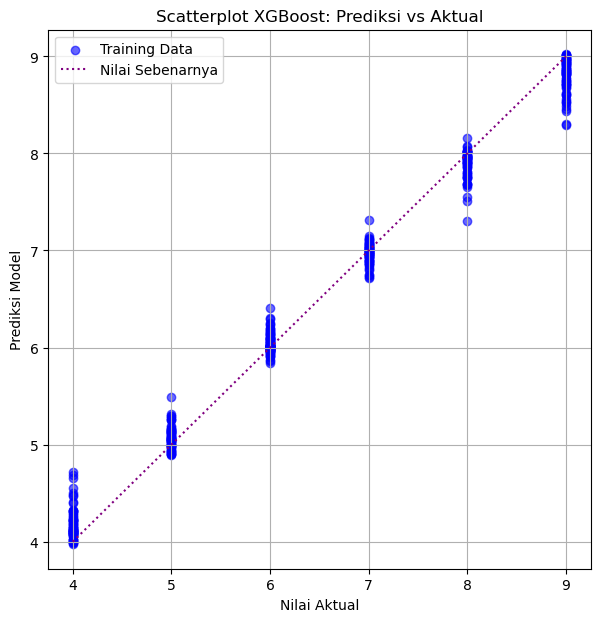

In [38]:
plt.figure(figsize=(7, 7))
plt.scatter(y_train, y_pred_train_xgb, color="blue", label="Training Data", alpha=0.6)
x_vals = np.linspace(min(y_train), max(y_train), 100)
plt.plot(x_vals, x_vals, linestyle="dotted", color="purple", label="Nilai Sebenarnya")

plt.xlabel("Nilai Aktual")
plt.ylabel("Prediksi Model")
plt.title("Scatterplot XGBoost: Prediksi vs Aktual")
plt.legend()
plt.grid(True)
plt.show()

Dari grafik ini, mayoritas titik berada sangat dekat dengan garis, menunjukkan bahwa model XGBoost mampu memprediksi dengan sangat baik pada data training. Model XGBoost memiliki performa yang sangat baik pada data training, dengan prediksi yang hampir sesuai dengan nilai aktual. 

In [39]:
import joblib
import pickle

In [46]:
def save_model(model, ObesityDataSet_raw_and_data_sinthetic):
    joblib.dump(model, f'{ObesityDataSet_raw_and_data_sinthetic}.joblib')
    with open(f'{ObesityDataSet_raw_and_data_sinthetic}.pkl', 'wb') as f:
        pickle.dump(model, f)

In [47]:
def load_model(ObesityDataSet_raw_and_data_sinthetic):
    model = joblib.load(f'{ObesityDataSet_raw_and_data_sinthetic}.joblib')
    with open(f'{ObesityDataSet_raw_and_data_sinthetic}.pkl', 'rb') as f:
        model = pickle.load(f)
    return model

In [62]:
def predict_mental_health(model):
    print("=== Silakan Masukkan Data Individu ===")
    Gender = input("Jenis Kelamin (Male/Female): ")
    Age = int(input("Masukkan Usia: "))
    Symptom_Severity = int(input("Severity Gejala (1-10): "))
    Mood_Score = int(input("Skor Mood (1-10): "))
    Sleep_Quality = int(input("Kualitas Tidur (1-10): "))
    Physical_Activity = int(input("Aktivitas Fisik (jam/minggu): "))
    Treatment_Duration = int(input("Durasi Perawatan (minggu): "))
    Stress_Level = int(input("Tingkat Stres (1-10): "))
    Treatment_Progress = int(input("Kemajuan Perawatan (1-10): "))

    Gender = 1 if Gender.lower() == "male" else 0

    data_baru = np.array([Gender, 
                          Age, 
                          Symptom_Severity, 
                          Mood_Score, 
                          Sleep_Quality,
                          Physical_Activity, 
                          Treatment_Duration, 
                          Stress_Level,
                          Treatment_Progress,])


    data_baru = data_baru.reshape(1, -1)
    prediksi = model.predict(data_baru)[0] * 10
    kategori = "Baik" if prediksi >= 70 else "Sedang" if prediksi >= 40 else "Buruk"
    
    print("\n=== Hasil Prediksi ===")
    print(f"Perkiraan tingkat kesehatan mental: {prediksi:.2f}%")
    print(f"Kategori Obesitas: {kategori}")


In [67]:
save_model(model_xgb, "xgboost_model")

In [68]:
model_xgb = load_model("xgboost_model")
predict_mental_health(model_xgb)

=== Silakan Masukkan Data Individu ===


Jenis Kelamin (Male/Female):  Female
Masukkan Usia:  23
Severity Gejala (1-10):  7
Skor Mood (1-10):  7
Kualitas Tidur (1-10):  7
Aktivitas Fisik (jam/minggu):  1
Durasi Perawatan (minggu):  3
Tingkat Stres (1-10):  5
Kemajuan Perawatan (1-10):  7



=== Hasil Prediksi ===
Perkiraan tingkat kesehatan mental: 72.19%
Kategori Obesitas: Baik


Kesimpulan

Notebook ini berisi analisis data mengenai faktor-faktor yang berhubungan dengan kesehatan mental, terutama dalam kaitannya dengan kualitas tidur dan perawatan. Proses yang dilakukan mencakup data loading, data cleansing, eksplorasi data, visualisasi korelasi antar fitur, serta model prediksi menggunakan algoritma regresi seperti Gradient Boosting Regressor, Random Forest Regressor, dan XGBoost.

Hasil Analisis Data
1. Hubungan Kualitas Tidur dengan Kesehatan Mental

    Terdapat korelasi antara kualitas tidur dengan tingkat stres, mood, dan progres perawatan.
Semakin buruk kualitas tidur, semakin tinggi tingkat stres dan semakin rendah mood serta progres perawatan.

2. Prediksi Hasil Perawatan

    Model regresi yang digunakan bertujuan untuk memprediksi hasil perawatan berdasarkan faktor-faktor seperti tingkat keparahan gejala, aktivitas fisik, dan durasi perawatan. XGBoost memberikan performa yang lebih baik dibandingkan Gradient Boosting Regressor dan Random Forest Regressor  dalam memprediksi hasil perawatan.

Kesimpulan Utama

- Kualitas tidur memiliki hubungan signifikan dengan kesehatan mental dan progres perawatan.
- Model regresi dapat membantu dalam memprediksi keberhasilan perawatan pasien berdasarkan faktor-faktor tertentu.
- Faktor seperti stres, mood, dan aktivitas fisik juga berpengaruh terhadap hasil perawatan kesehatan mental.

Source: 
- Sari, H. R. A., Fitriani, R. K., Arini, S. Y., & Sulistyowati, M. (tahun). Hubungan Kualitas Tidur Dengan Psychological Distress Pada Mahasiswa Universitas X. Departemen Epidemiologi, Biostatistika Kependudukan dan Promosi Kesehatan, Fakultas Kesehatan Masyarakat, Universitas Airlangga.